In [1]:
### in this task missing values *should be imputed* with the mean value of the column
### impute missing values only in columns required for solutions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 4)})

#%matplotlib inline
#import matplotlib_inline
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv("amazon_books_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        946 non-null    object 
 1   author       824 non-null    object 
 2   price        944 non-null    float64
 3   pages        934 non-null    float64
 4   avg_reviews  823 non-null    float64
 5   n_reviews    946 non-null    int64  
 6   dimensions   914 non-null    object 
 7   weight       943 non-null    object 
 8   language     943 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 66.6+ KB


In [4]:
### Data correction and imputation:

In [5]:
### Weight imputation:
# TODO: maybe fix this
df['weight'] = df['weight'].fillna("-1.0 pounds")
df['weight'] = df['weight'].apply(lambda x: float(str(x)[:-6]) * (1/16) if str(x).endswith('ounces') else float(str(x)[:-6]))
mean = df[df['weight'] != -1.0]['weight'].mean()
df[df['weight']==-1.0] = mean

In [6]:
### Pages imputation:
# TODO: fix this
df['pages'] = df['pages'].fillna(-1)
mean = round(df[df['pages'] != -1]['pages'].mean())
df[df['pages'] == -1]['pages'] = mean

C:\Users\omere\AppData\Local\Temp\ipykernel_32612\1929201070.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['pages'] == -1]['pages'] = mean


In [7]:
### Volume imputation
def get_volume(dimensions):
    dimensions = str(dimensions)[:-6]
    dimensions = dimensions.split('x')
    volume = 1.0
    for length in dimensions:
        volume *= float(length)
    return float(volume)

df['dimensions'] = df['dimensions'].fillna('-1 x -1 x -1 inches')
df['volume'] = df['dimensions'].apply(get_volume)
mean = df[df['volume'] != -1.0]['volume'].mean()
df[df['volume']==-1.0] = mean
df['volume']

0       33.48000
1       47.60000
2       64.75000
3       47.25000
4       57.89700
         ...    
941     93.24000
942     54.68124
943    102.85000
944     53.29500
945     68.82000
Name: volume, Length: 946, dtype: float64

In [8]:
### Price imputation:
# TODO: maybe fix this
mean = df['price'].mean()
df['price'] = df['price'].fillna(mean)

In [9]:
df.pages

0      272.0
1      301.0
2      446.0
3      347.0
4      413.0
       ...  
941    832.0
942    260.0
943    704.0
944    252.0
945    464.0
Name: pages, Length: 946, dtype: float64

#### Question 1

In [10]:
### decide what data type each column is: numerical-discrete, numerical-continuous, categorical-nominal, categorical-ordinal
### consider only [price, pages, avg_reviews, n_reviews, language] for this analysis
### no need to add explanations, just the final answer

# Final answer:
# price - numerical-continuous
# pages - numerical-discrete
# avg_reviews - numerical-continuous
# n_reviews - numerical-discrete
# language - categorical-nominal

answer_list = [('price', 'numerical-continuous'), ('pages', 'numerical-discrete'), ('avg_reviews', 'numerical-continuous'), ('n_reviews', 'numerical-discrete'), ('language', 'categorical-nominal')]
answer_df = pd.DataFrame(answer_list, columns=['Column', 'Type'])
answer_df

,Column,Type
0,price,numerical-continuous
1,pages,numerical-discrete
2,avg_reviews,numerical-continuous
3,n_reviews,numerical-discrete
4,language,categorical-nominal


#### Question 2

In [11]:
### compute Pearson's correlation between pages and weight in the data
### (you can use the built-in Series.corr() function for that purpose)
answer_df = pd.DataFrame([('Correlation', df['pages'].corr(df['weight']))])
answer_df

,0,1
0,Correlation,-0.21833


#### Question 3

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='pages', ylabel='weight'>

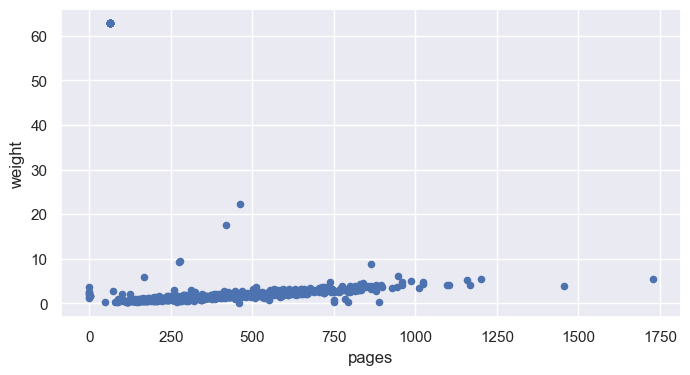

In [12]:
### show a scatter plot of pages (x) and weight (y)
### do the results fit the score you got in the previous cell? (no need to print answer to this question)
df[['pages', 'weight']].plot.scatter(x='pages', y='weight')

#### Question 4

In [13]:
### compute Pearson's correlation between a book's volume (inferred by its dimensions) and price in the data
### (you can use the built-in Series.corr() function for that purpose)
answer_df = pd.DataFrame([('Correlation', df['volume'].corr(df['price']))])
answer_df

,0,1
0,Correlation,0.435822


#### Question 5

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='volume', ylabel='price'>

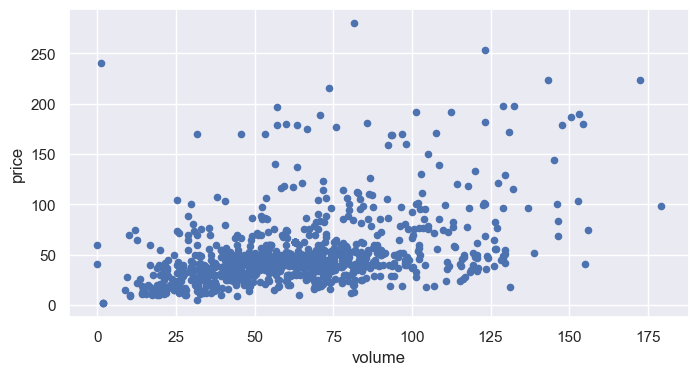

In [14]:
### show a scatter plot of a book's volume (inferred by its dimensions) and price
### do the results fit the score you got in the previous cell? (no need to print answer to this question)
df[['volume', 'price']].plot.scatter(x='volume', y='price')

#### Question 6

In [38]:
### inspect book titles carefully: they can be roughly split by keyphrases:
### ['data science', 'data analytics', 'data engineering', 'machine learning', 'statistics', 
### 'deep learning', 'natural language processing']

### a book belongs to one of the above categories if its name contains the corresponding keyphrase
### display the number of books that fall into each category and their total, in the same table
### some books may not belong to any of the listed above categories

key_phrases = ['data science', 'data analytics', 'data engineering', 'machine learning', 'statistics', 'deep learning', 'natural language processing']
df['title'] = df['title'].apply(lambda x: str(x).lower())
df['category'] = df['title'].apply(lambda x: [key_phrase for key_phrase in key_phrases if key_phrase in x])
key_counts = list()
for key_phrase in key_phrases:
    df[key_phrase] = df['category'].apply(lambda x: 1 if key_phrase in x else 0)
    key_counts.append((key_phrase, len(df[df[key_phrase] == 1])))

total = len(df[df['category'].apply(lambda x: len(x) > 0)])
key_counts.append(('Total', total))

answer_df = pd.DataFrame(key_counts, columns=['Key Phrase', 'Count'])
answer_df

,Key Phrase,Count
0,data science,108
1,data analytics,28
2,data engineering,7
3,machine learning,171
4,statistics,127
5,deep learning,131
6,natural language processing,13
7,Total,511


#### Question 7

In [39]:
### display the same result where the dataframe is sorted by the number of books, descending
### no need to display the total amount in this result - drop it
answer_df = answer_df.sort_values(by='Count', ascending=False)
answer_df = answer_df.drop(index=7)
answer_df.reset_index(drop=True, inplace=True)
answer_df

,Key Phrase,Count
0,machine learning,171
1,deep learning,131
2,statistics,127
3,data science,108
4,data analytics,28
5,natural language processing,13
6,data engineering,7


#### Question 8

In [17]:
### sample 10000 values from N~(10, 5)
### for this purpose use https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

### what portion of the distribution is found in the range (2.5, 17.5)? -- calculate using z table
### (recall the NormalDist().cdf() function we used at the lecture)

### what portion of the distribution is found in the range (2.5, 17.5)? -- compute empirically using the sampled values
### report both values (calculated and empirical)

#### Question 9

In [18]:
### compute confidence interval of 95% for the true population mean of a book price on Amazon
### report left and right boundaries

#### Question 10

In [19]:
### can one say with (at least) 85% confidence that the true population mean of a book price resides within the [50.0, 53.0] interval?
### show your computations, and print your answer: yes or no